# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [3]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Merge / Transform

In [2]:
# 生成範例用的資料 ()
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

In [3]:
# 沿縱軸合併
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [4]:
# 沿橫軸合併
result = pd.concat([df1, df4], axis = 1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [5]:
# 沿橫軸合併
result = pd.concat([df1, df4], axis = 1, join = 'inner') # 硬串接
print(result)

result = pd.merge(df1, df4, how='inner')
print(result)

    A   B   C   D   B   D   F
2  A2  B2  C2  D2  B2  D2  F2
3  A3  B3  C3  D3  B3  D3  F3
    A   B   C   D   F
0  A2  B2  C2  D2  F2
1  A3  B3  C3  D3  F3


In [6]:
# 將 欄-列 逐一解開
print(df1)
df1.melt()

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3


,variable,value
0,A,A0
1,A,A1
2,A,A2
3,A,A3
4,B,B0
5,B,B1
6,B,B2
7,B,B3
8,C,C0
9,C,C1


## Subset

In [1]:
# 設定 data_path
dir_data = 'D:/Github/2nd-ML100Days/data/'

In [4]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: D:/Github/2nd-ML100Days/data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# 取 TARGET 為 1 的
sub_df = app_train[app_train['TARGET'] == 1]
#sub_df = app_train.loc[app_train['TARGET'] == 1,:]
sub_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# 取 AMT_INCOME_TOTAL 大於平均資料中，SK_ID_CURR, TARGET 兩欄
sub_df = app_train.loc[app_train['AMT_INCOME_TOTAL'] > app_train['AMT_INCOME_TOTAL'].mean(), ['SK_ID_CURR', 'TARGET']]
sub_df.head()

,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
6,100009,0
7,100010,0
13,100017,0


## Groupby

In [10]:
app_train.groupby(['NAME_CONTRACT_TYPE']).size()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
dtype: int64

In [11]:
app_train.groupby(['NAME_CONTRACT_TYPE'])['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_CONTRACT_TYPE,,,,,,,,
Cash loans,278232.0,169069.513575,245910.950896,25650.0,112500.0,153000.0,202500.0,117000000.0
Revolving loans,29279.0,166217.017656,126028.600660,27000.0,99000.0,135000.0,202500.0,4500000.0


In [12]:
app_train.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].mean()

NAME_CONTRACT_TYPE
Cash loans         0.083459
Revolving loans    0.054783
Name: TARGET, dtype: float64

In [22]:
# 根據 NAME_CONTRACT_TYPE 分組後的平均數
app_train.groupby(['NAME_CONTRACT_TYPE'])['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY'].describe()

AMT_INCOME_TOTAL                                         \
                              count           mean            std      min   
NAME_CONTRACT_TYPE                                                           
Cash loans                 278232.0  169069.513575  245910.950896  25650.0   
Revolving loans             29279.0  166217.017656  126028.600660  27000.0   

                                                              AMT_CREDIT  \
                         25%       50%       75%          max      count   
NAME_CONTRACT_TYPE                                                         
Cash loans          112500.0  153000.0  202500.0  117000000.0   278232.0   
Revolving loans      99000.0  135000.0  202500.0    4500000.0    29279.0   

                                   ...                      AMT_ANNUITY  \
                             mean  ...       75%        max       count   
NAME_CONTRACT_TYPE                 ...                                    
Cash loans          627965.732538  ...  835380.0  4050000.0    278220.0   
Revolving loans     324017.982172  ...  360000.0  2250000.0     29279.0   

                                                                          \
                            mean           std     min      25%      50%   
NAME_CONTRACT_TYPE                                                         
Cash loans          28244.263958  14167.189802  1615.5  18103.5  26086.5   
Revolving loans     16316.822637  13049.525707  6750.0   9000.0  13500.0   

                                       
                        75%       max  
NAME_CONTRACT_TYPE                     
Cash loans          35694.0  258025.5  
Revolving loans     18000.0  225000.0  

[2 rows x 24 columns]

In [23]:
app_train.loc[:5,'AMT_INCOME_TOTAL']

0    202500.0
1    270000.0
2     67500.0
3    135000.0
4    121500.0
5     99000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [25]:
# 取前 10000 筆作範例: 分別將 AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY 除以根據 NAME_CONTRACT_TYPE 分組後的平均數，
app_train.loc[0:1000, ['NAME_CONTRACT_TYPE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']].groupby(['NAME_CONTRACT_TYPE']).apply(lambda x: x / x.mean())

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
0,1.218490,0.654278,0.877955
1,1.624653,2.081445,1.268868
2,0.372857,0.382895,0.382895
3,0.812327,0.503154,1.055177
4,0.731094,0.825496,0.777188
5,0.595706,0.789283,0.978082
6,1.028947,2.511449,1.468003
7,2.166204,2.462006,1.495514
8,0.676939,1.640710,1.202330
9,0.745714,1.148684,1.148684


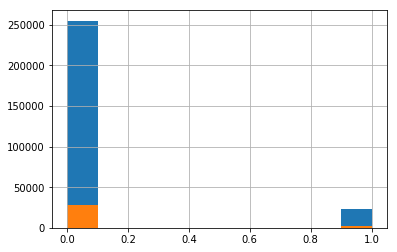

In [15]:
app_train.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].hist()
plt.show()

## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數